# Imports

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [104]:
data_df = pd.read_csv(f'Worldometer-data-preprocessed/table_18-04-2022_preprocessed.csv')
data_df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,Density
0,China,185035.0,2742.0,4641.0,3.0,151407.0,1637.0,28987.0,71.0,160000000.0,1.439324e+09,Asia,149.2199
1,USA,82383494.0,26881.0,1015821.0,109.0,80244093.0,41383.0,1123580.0,1438.0,996639125.0,3.344853e+08,North America,36.0000
2,India,43045527.0,1247.0,521996.0,31.0,42511701.0,928.0,11830.0,698.0,832104846.0,1.404347e+09,Asia,427.8611
3,Brazil,30261088.0,8470.0,662076.0,65.0,29262483.0,35432.0,336529.0,8318.0,63776166.0,2.152705e+08,South America,25.2888
4,France,27790834.0,19810.0,144205.0,48.0,25132351.0,217445.0,2514278.0,1541.0,260504402.0,6.553266e+07,Europe,118.8782


In [105]:
week_df = pd.read_csv(f'Worldometer-data-preprocessed/data_1_week.csv')
week_df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,day,Density
0,China,185035.0,2742.0,4641.0,3.0,151407.0,1637.0,28987.0,71.0,160000000.0,1.439324e+09,Asia,18-04-2022,149.2199
1,USA,82383494.0,26881.0,1015821.0,109.0,80244093.0,41383.0,1123580.0,1438.0,996639125.0,3.344853e+08,North America,18-04-2022,36.0000
2,India,43045527.0,1247.0,521996.0,31.0,42511701.0,928.0,11830.0,698.0,832104846.0,1.404347e+09,Asia,18-04-2022,427.8611
3,Brazil,30261088.0,8470.0,662076.0,65.0,29262483.0,35432.0,336529.0,8318.0,63776166.0,2.152705e+08,South America,18-04-2022,25.2888
4,France,27790834.0,19810.0,144205.0,48.0,25132351.0,217445.0,2514278.0,1541.0,260504402.0,6.553266e+07,Europe,18-04-2022,118.8782


# Trực quan các mối quan hệ giữa các trường dữ liệu

## 1. Một trường đơn

### a) Total Cases

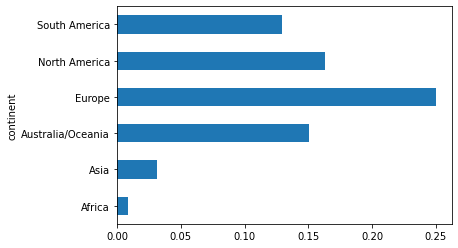

In [4]:
tcdf = data_df.groupby('continent')[['Total Cases', 'Population']].sum()
tcdf['Total Cases'] = tcdf['Total Cases']/tcdf['Population']
tcdf['Total Cases'].plot.barh();

Nhận xét: tổng số ca nhiễm ở châu Âu nhiều nhất

### b) Total Deaths

In [5]:
df = week_df.groupby(['continent', 'day'])[['Total Deaths']].sum()
df = df.reset_index()
df.head()

,continent,day,Total Deaths
0,Africa,18-04-2022,253519.0
1,Africa,19-04-2022,253559.0
2,Africa,20-04-2022,253596.0
3,Africa,21-04-2022,253667.0
4,Africa,22-04-2022,253681.0


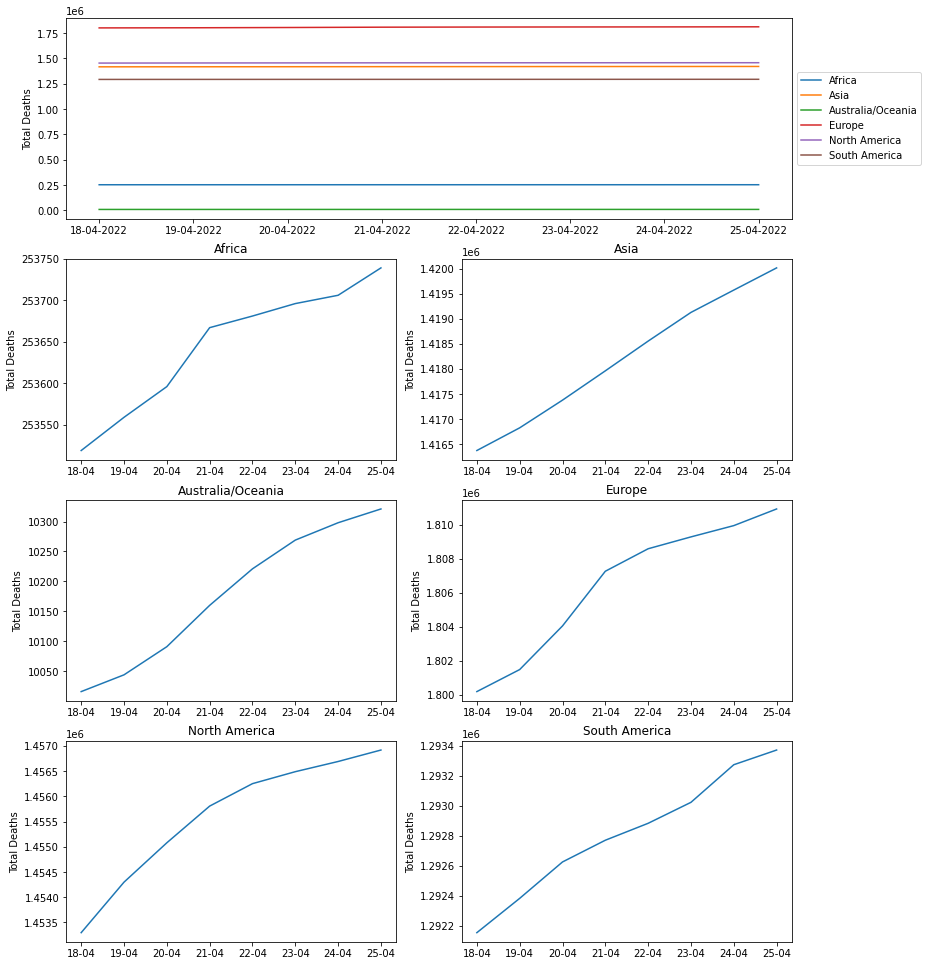

In [6]:
plt.figure(figsize=(13, 17))

ax = plt.subplot(4,2,(1,2))
sns.lineplot(data=df, x='day', y='Total Deaths', hue='continent', ax=ax);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax.set_xlabel('')


for i, continent in enumerate(df['continent'].unique(), 3):
    continent_df = df.loc[df['continent'] == continent, 'Total Deaths']
    ax = plt.subplot(4,2,i)

    continent_df = df.loc[df['continent'] == continent, ['day', 'Total Deaths']].set_index('day')
    continent_df.plot.line(ax=ax, legend=None, title=continent, ylabel='Total Deaths', xlabel='')
    # rút gọn xtick từ dd-mm-yyy về dd-mm
    xticks = ax.get_xticks() # [-1, 0, 1,...]
    trunc_labels = [d[0:5] for d in continent_df.index]
    # thay đổi xticks labels
    ax.set_xticks(xticks[1:-1])
    ax.set_xticklabels(trunc_labels)

Nhận xét: Tổng người chết (`Total Deaths`) của mỗi châu lục trong 1 tuần từ 18/4/2022 tới 25/4/2022 không có sự thay đổi rõ rệt, gần như chỉ tăng 1 lượng ít

### c) New Cases, New Deaths, New Recovered
- Ta sẽ xem xét 3 cột này trong 1 tuần, từ 18/4/2022 - 25/4/2022

In [7]:
# data 18-04
df = data_df.groupby('continent')[['New Cases', 'New Deaths', 'New Recovered']].sum().reset_index()
df['day'] = 18

# data 25-04
df_25 = pd.read_csv(f'Worldometer-data-preprocessed/table_25-04-2022_preprocessed.csv')
df_25 = df_25.groupby('continent')[['New Cases', 'New Deaths', 'New Recovered']].sum().reset_index()
df_25['day'] = 25

df = pd.concat([df, df_25], axis=0)
df.head()

,continent,New Cases,New Deaths,New Recovered,day
0,Africa,1139.0,39.0,820.0,18
1,Asia,147568.0,490.0,128362.0,18
2,Australia/Oceania,40610.0,19.0,56266.0,18
3,Europe,120322.0,693.0,730283.0,18
4,North America,35540.0,143.0,49775.0,18


- Góc nhìn từ slope graph

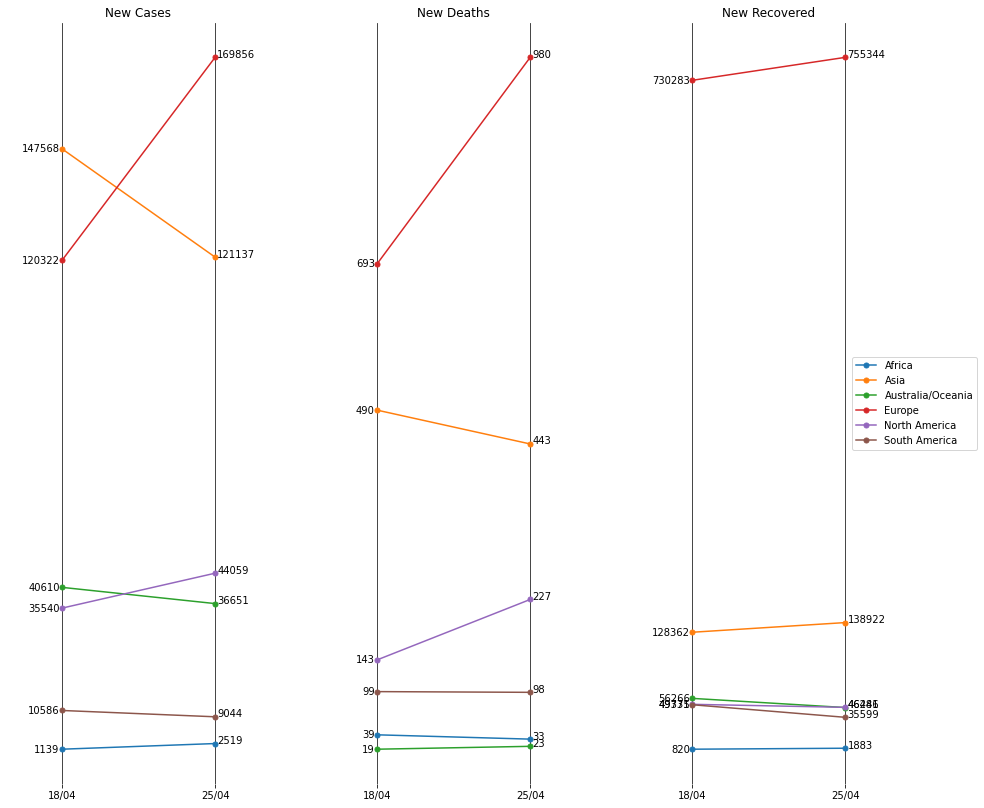

In [8]:
cols = ['New Cases', 'New Deaths', 'New Recovered']
continents = df['continent'].unique()
plt.figure(figsize=(16, 14))

for i, col in enumerate(cols, 1):
    ax = plt.subplot(1,3,i)
    for continent in continents:
        temp = df[df['continent'] == continent]
        plt.plot(temp['day'], temp[col], marker='o', markersize=5)
        plt.text(temp['day'].values[1]+0.1, temp[col].values[1], int(temp[col].values[1]))
        plt.text(temp['day'].values[0]-0.1, temp[col].values[0], int(temp[col].values[0]), va='center', ha='right')

    # x limits, x ticks
    plt.xlim(15.5, 27.5)
    plt.xticks([18, 25], ['18/04', '25/04'])

    # get y ticks, replace 1,000 with k, and draw the ticks
    yticks = plt.yticks()[0]
    plt.yticks([])

    # title
    plt.title(col)

    # grid
    ax.xaxis.grid(color='black', linestyle='solid', which='both', alpha=0.9)

    # remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)

    if i==3:
        plt.legend(continents, loc='center left', bbox_to_anchor=(0.8, 0.5));

Nhận xét: 
- `New Cases`:
- `New Deaths`
- `New Recovered`

- Góc nhìn từ area plot:

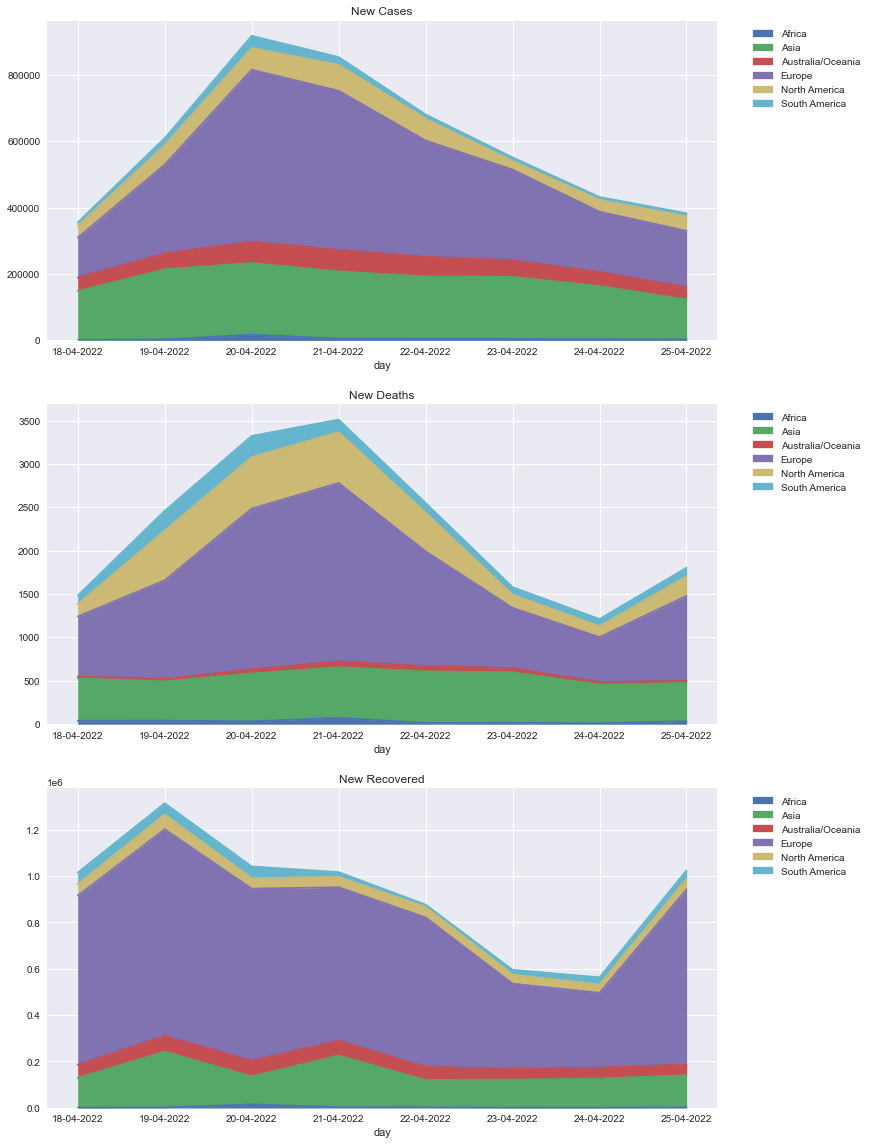

In [9]:
## AREA PLOT: 3 subplot (mỗi cái đại diện cho 1 cột new/subplot, mỗi subplot chứa 7 đường tương ứng 7 châu) ##
plt.style.use('seaborn')
df = week_df.groupby(['continent', 'day'])[['New Cases', 'New Deaths', 'New Recovered']].agg(sum)

for i, col in enumerate(['New Cases', 'New Deaths', 'New Recovered'], 1):
  ax = plt.subplot(3,1,i)
  df_col = df[[col]].reset_index(0)
  df_col = df_col.pivot_table(values=col, index=df_col.index, columns='continent')
  df_col.plot.area(stacked=True, ax=ax, figsize=(12,20), title=col);
  plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Nhận xét: ...

### d) Active Cases

<AxesSubplot:title={'center':'Active Cases (25/4)'}>

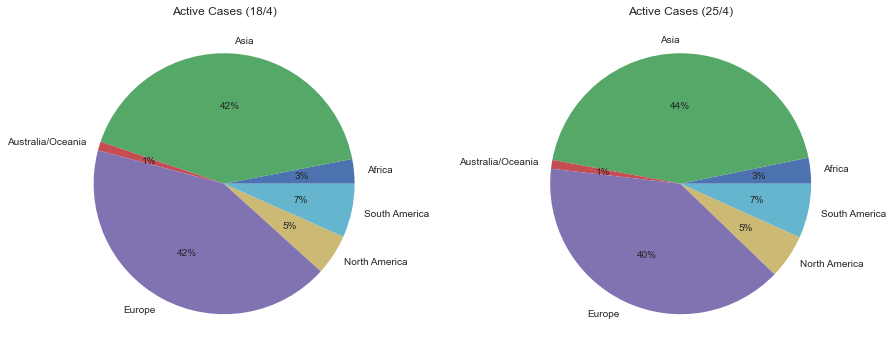

In [10]:
df = data_df.groupby('continent')[['Active Cases']].sum().rename(columns={'Active Cases': 'Active Cases (18/4)'})
df_25 = pd.read_csv(f'Worldometer-data-preprocessed/table_25-04-2022_preprocessed.csv')
df['Active Cases (25/4)'] = df_25.groupby('continent')[['Active Cases']].sum()['Active Cases']

ax = plt.subplot(1,2,1)
df.plot(kind='pie', y='Active Cases (18/4)', autopct='%1.0f%%', figsize=(15, 6), ylabel='', legend='', ax=ax,
        title='Active Cases (18/4)')

ax = plt.subplot(1,2,2)
df.plot(kind='pie', y='Active Cases (25/4)', autopct='%1.0f%%', figsize=(15, 6), ylabel='', legend='', ax=ax,
        title='Active Cases (25/4)')


Nhận xét: ...

### d) New Deaths

In [106]:
world_df = week_df.groupby(['day'])['New Deaths'].agg(sum)
world_df = world_df.reset_index()
world_df.head()

,day,New Deaths
0,18-04-2022,1483.0
1,19-04-2022,2461.0
2,20-04-2022,3324.0
3,21-04-2022,3513.0
4,22-04-2022,2551.0


In [107]:
world_new_death_mean = world_df['New Deaths'].mean()
world_df['Status'] = world_df['New Deaths'].apply(lambda x: 'Extreme' if x > world_new_death_mean else 'Normal')

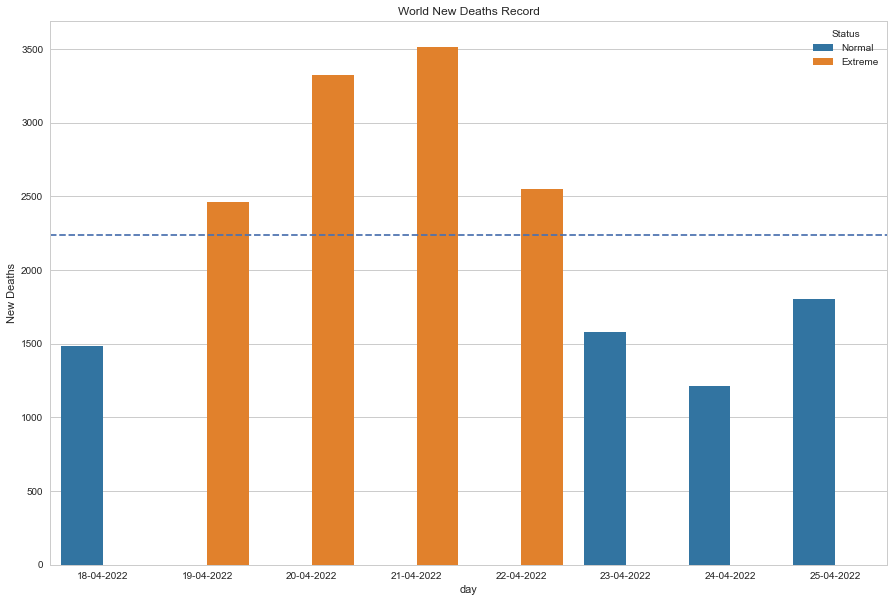

In [108]:
plt.figure(figsize=(15, 10))

sns.barplot(x='day', y='New Deaths', data=world_df, hue='Status', palette='tab10')
plt.axhline(world_new_death_mean,ls='--');
plt.title('World New Deaths Record');

Nhận xét: Trong 3 ngày 19/04/2022 $\to$ 21/04/2022, số lượng ca tử vong mới tăng nhiều hơn hẳn các ngày còn lại. Ta sẽ tiến hành xem kỹ hơn số liệu của 3 ngày này.

In [110]:
df = week_df.groupby(['continent', 'day'])['New Deaths'].agg(sum)
df = df.reset_index()
df = df[df['day'].isin(['19-04-2022', '20-04-2022', '21-04-2022'])]
df.head()

,continent,day,New Deaths
1,Africa,19-04-2022,40.0
2,Africa,20-04-2022,32.0
3,Africa,21-04-2022,71.0
9,Asia,19-04-2022,453.0
10,Asia,20-04-2022,553.0


Xét ngày 19-04-2022

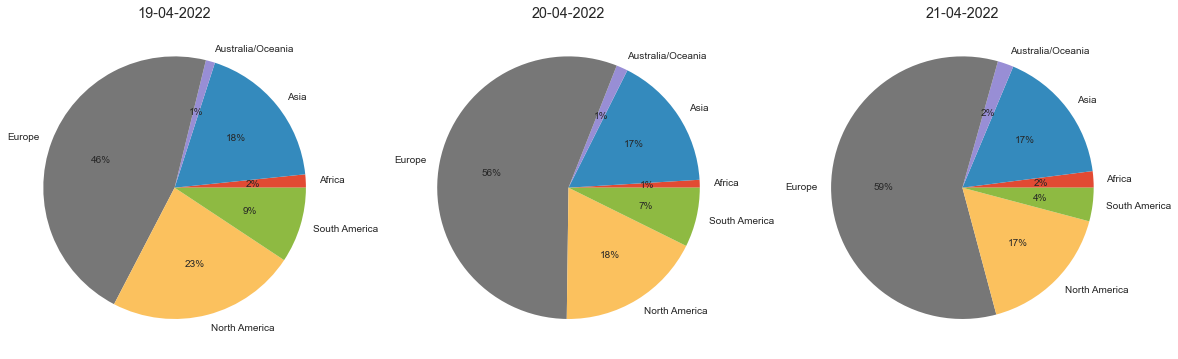

In [113]:
plt.figure(figsize=(20, 15))
plt.style.use('ggplot')

for i, d in enumerate(['19-04-2022', '20-04-2022', '21-04-2022'], 1):
    plt.subplot(1, 3, i)

    new_df = df[df['day'] == d]
    plt.pie(x=new_df['New Deaths'], labels=new_df['continent'], autopct='%.0f%%');
    plt.title(d)

Nhận xét: ....<br>

Có quan hệ nhân quả nào ở đây không?

## 2. Nhiều trường

### Total Deaths ~ Total Recovered

In [11]:
df = data_df[['Country', 'Total Recovered', 'Total Deaths']].set_index('Country')
df['Total Deaths'] = df['Total Deaths']
df.head()

,Total Recovered,Total Deaths
Country,,
China,151407.0,4641.0
USA,80244093.0,1015821.0
India,42511701.0,521996.0
Brazil,29262483.0,662076.0
France,25132351.0,144205.0


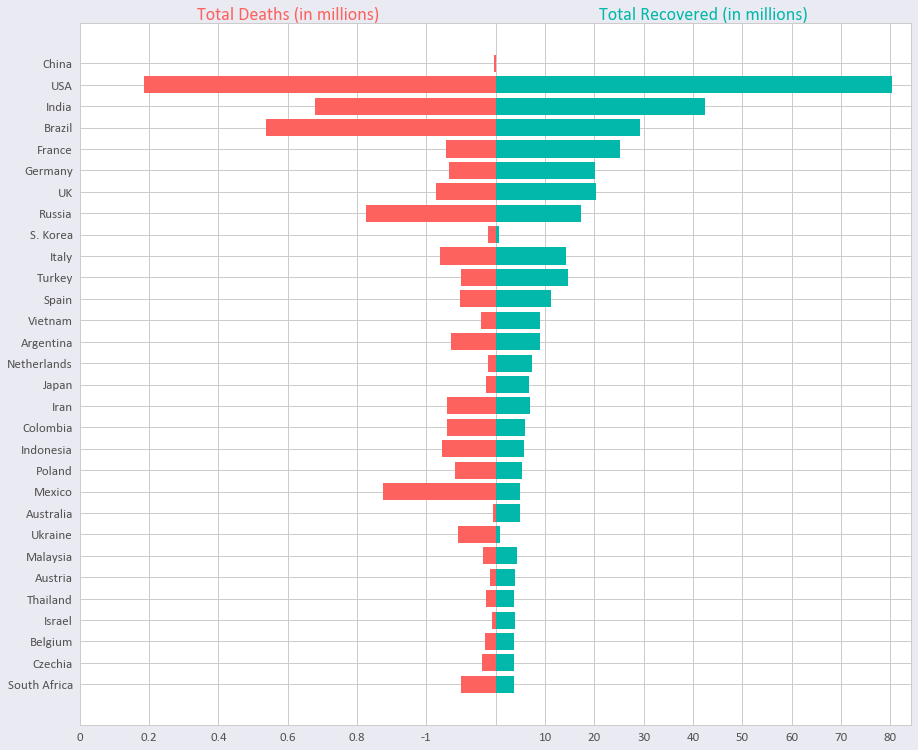

In [12]:
plt.style.use('seaborn-whitegrid') # fast
_df = df.iloc[:30]
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = _df.index
fig, axes = plt.subplots(figsize=(15,13), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout() #adjusts subplot params so that subplots are nicely fit in the figure.

axes[0].barh(index, _df['Total Deaths'], align='center', color=color_red, zorder=10)
axes[0].set_title('Total Deaths (in millions)', fontsize=18, pad=2, color=color_red, **hfont)
axes[1].barh(index, _df['Total Recovered'], align='center', color=color_blue, zorder=10)
axes[1].set_title('Total Recovered (in millions)', fontsize=18, pad=2, color=color_blue, **hfont)
axes[0].invert_xaxis()
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

# thay đổi xticks labels
axes[1].set_xticks(np.array([10, 20, 30, 40, 50, 60, 70, 80])*1e6)
axes[1].yaxis.set_tick_params(size=0)
axes[1].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80])

# thay đổi xticks labels
axes[0].set_xticks(axes[0].get_xticks()[1:])
axes[0].set_xticklabels([-1, 0.8, 0.6, 0.4, 0.2, 0])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)    

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95) #wspace=0 for no gap between the two axes

Nhận xét: ...

### Active Cases ~ Total Deaths ~ Total Recovered

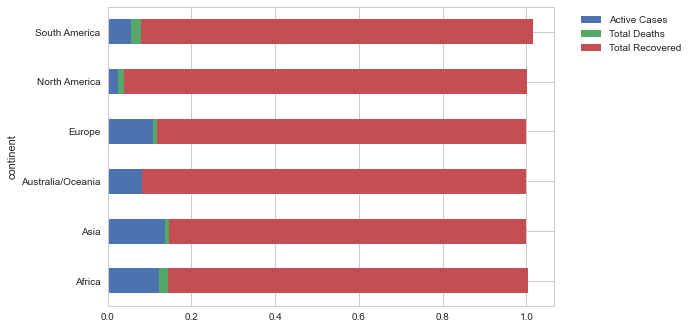

In [13]:
df = data_df.groupby('continent')[['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']].sum()
df['Active Cases'] = df['Active Cases'] / df['Total Cases']
df['Total Deaths'] = df['Total Deaths'] / df['Total Cases']
df['Total Recovered'] = df['Total Recovered'] / df['Total Cases']
df.drop(columns=['Total Cases'], inplace=True)
df.plot.barh(stacked=True);
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Nhận xét: `Total Cases` cấu thành từ 3 phần: `Active Cases`, `Total Deaths` (chiếm ít nhất) & `Total Recovered` (chiếm nhiều nhất)

### `Total Cases` ~ (`Active Cases`, `Total Deaths`, `Total Recovered`)

- Ref: https://pbpython.com/waterfall-chart.html

In [14]:
world_18 = data_df[['Total Cases', 'Active Cases', 'Total Deaths', 'Total Recovered']].sum()
df_25 = pd.read_csv(f'Worldometer-data-preprocessed/table_25-04-2022_preprocessed.csv')
world_25 = df_25[['Total Cases', 'Active Cases', 'Total Deaths', 'Total Recovered']].sum()

df = world_18[['Total Cases']]
df = pd.concat([df,
                world_25[['Active Cases']] - world_18[['Active Cases']],
                world_25[['Total Deaths']] - world_18[['Total Deaths']],
                world_25[['Total Recovered']] - world_18[['Total Recovered']]])
df = pd.DataFrame(df, columns=['amount'])
df = pd.concat([df, 
                pd.DataFrame({'amount': [df['amount'].sum()]}).rename(index={0: 'Total Cases (25/4)'})], 
               axis=0)
df.rename({'Total Cases':'Total Cases (18/4)'}, inplace=True)
df

,amount
Total Cases (18/4),505262739.0
Active Cases,-1852229.0
Total Deaths,19760.0
Total Recovered,6517117.0
Total Cases (25/4),509947387.0


In [15]:
text = df['amount'].apply(lambda x: str(x) if x < 0 else '+' + str(x))

fig = go.Figure(go.Waterfall(
    x = df.index,
    text=text, textposition = "outside",
    y = df['amount'][:-1].to_list() + [None],
    measure = [ "absolute","relative", "relative","relative", "total" ]   
))
fig.update_layout(
    yaxis_range=[4.95 * 1e8, 5.7 * 1e8],
    title='Total Cases progress', showlegend = True)

Nhận xét: ...

### Coi kỹ từng quan hệ giữa các cặp thuộc tính ['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']


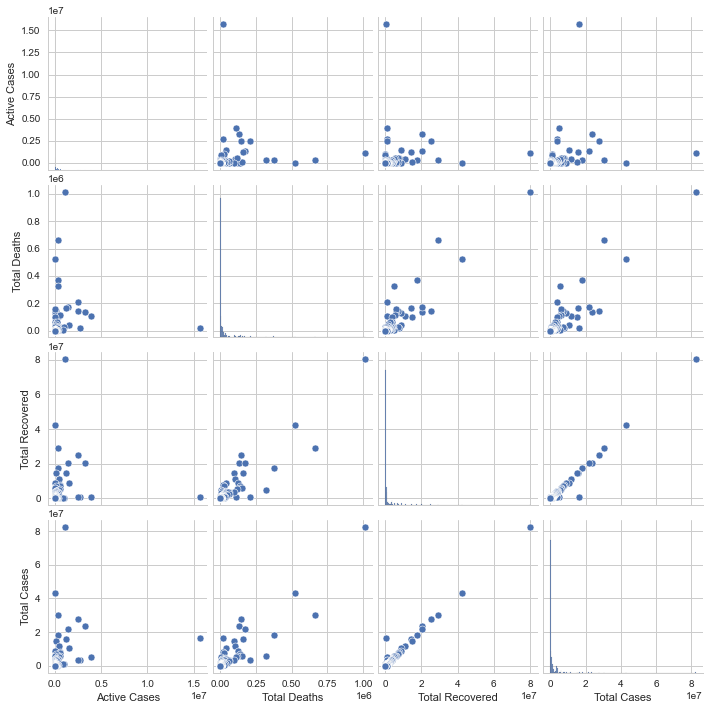

In [16]:
plt.figure(figsize=(15,10))
cols = ['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']
sns.pairplot(data_df[cols],kind='scatter');

Nhận xét: `Total Recovered` & `Total Cases` có quan hệ gần như tuyến tính. Cụ thể là nếu `Total Cases` tăng/giảm thì `Total Recovered` cũng tăng/giảm, ta sẽ thử chọn ngẫu nhiên mỗi 10 nước và xây dựng biểu đồ **group bar chart** để xem thử có đúng như vậy không

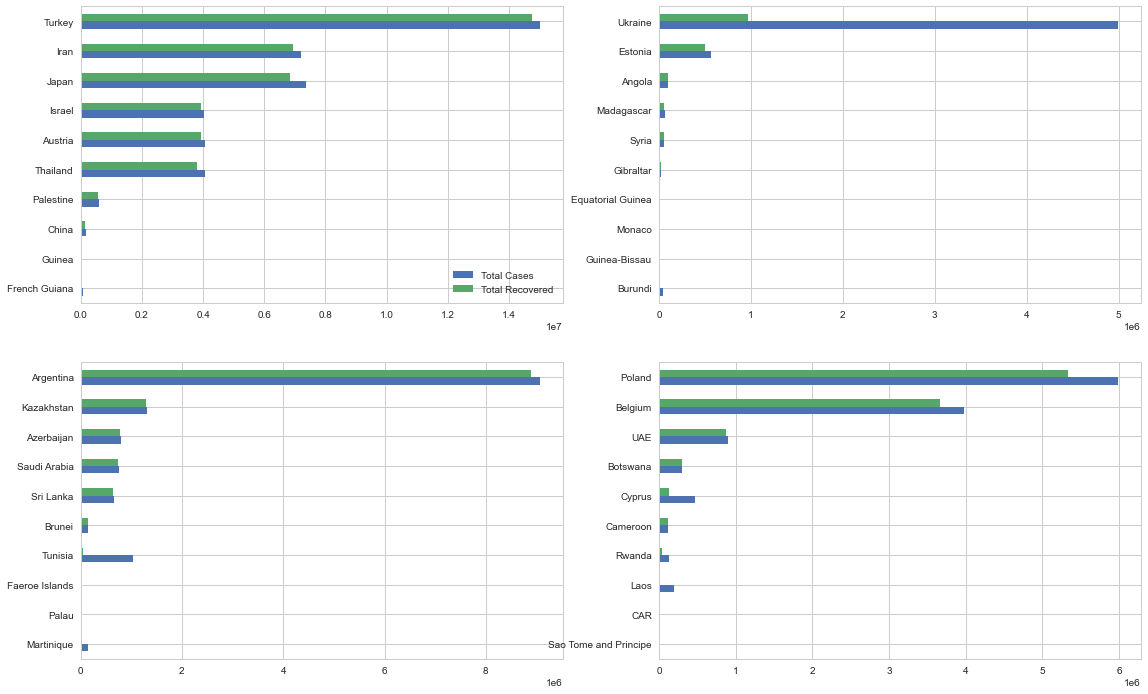

In [17]:
df = data_df[['Country', 'Total Cases', 'Total Recovered']].set_index('Country')

for i in range(4):  
    ax = plt.subplot(2,2,i+1)
    df_10 = df.sample(10, replace=False)
    df_10.sort_values('Total Recovered').plot.barh(ax=ax, figsize=(19,12), xlabel="")
    if i > 0: ax.get_legend().remove()
    else: plt.legend(loc='lower right')
    df = df[~df.index.isin(df_10.index)]

- Mối quan hệ tuyến tính được thể hiện tương đối đúng ở hầu hết các nước, trừ 1 số nước đặc biệt thì có `Total Cases` cao hơn 1 số nước nhưng `Total Recovered` lại thấp hơn (VD: Ukraine, Tunisia, ...)

- 1 cách tổng quan, ta sẽ vẽ scatter plot cho toàn bộ các trường dữ liệu

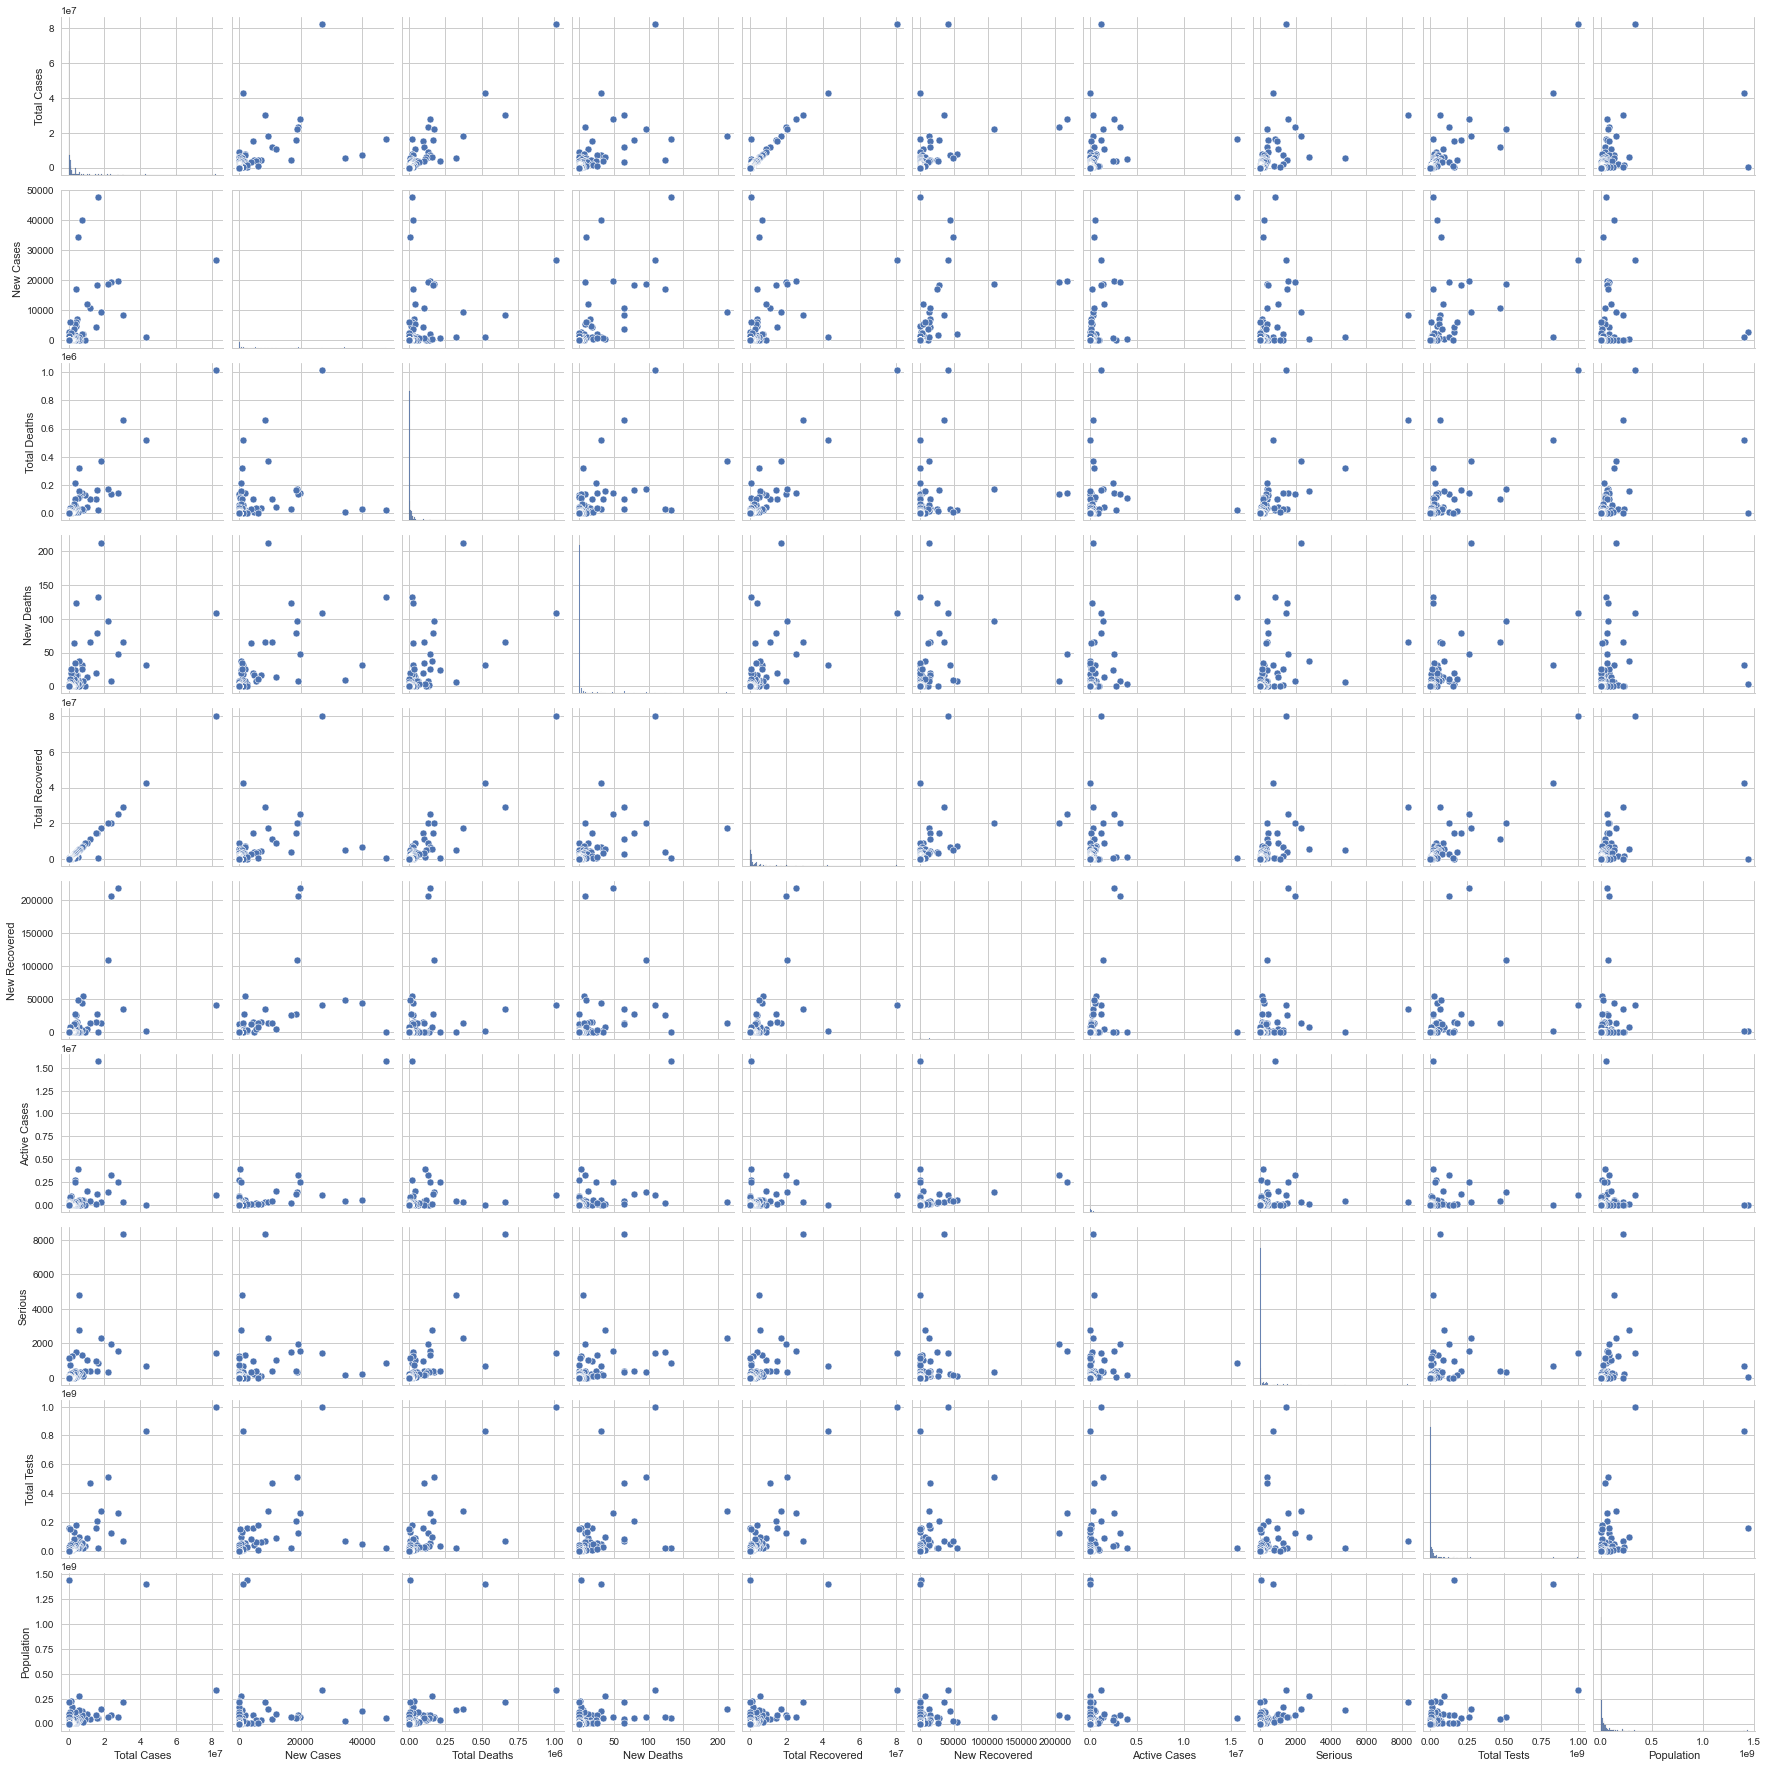

In [18]:
df_calculate = data_df[data_df.columns[1:]]
sns.pairplot(df_calculate,kind='scatter')
plt.show()

Nhận xét: ...

### Active Cases & Total Recovered

In [ ]:
# ST here

### Dùng radar chart có 4 góc (4 thuộc tính: Total Cases, Total Deaths, Total Recovered, Total Tests); với 5 polygon là 5 nước, lần lượt có population thuộc [0, 20%], [20, 40%],...,[80, 100%]. Mục đích để kiểm tra hypothesis: population càng lớn thì thuộc tính x càng tăng

Ref: https://github.com/empathy87/storytelling-with-data/blob/master/talks/winter_school/presentation.pdf

In [100]:
df = data_df.copy()
df['quartile'] = pd.qcut(data_df['Population'], [0, 0.2, 0.4, 0.6, 0.8, 1],
                         labels=[5,4,3,2,1])
cnt=0
def get_median_index(df, cnt=cnt):
    # med = df['Population'].median()
    # dif = df['Population'] - med
    # return df.loc[dif.idxmin()]
    if cnt==0:
        cnt+=1 # tránh Vatican là 1 nước thiếu nhiều
        return df.sample(1, random_state=19)
    return df.loc[df['Population'] == df['Population'].median()]
df = df.groupby('quartile').apply(get_median_index).reset_index(drop=True)
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,quartile
0,Palau,4190.0,0.0,6.0,0.0,3803.0,0.0,381.0,0.0,42790.0,18249.0,Australia/Oceania,5
1,Iceland,183974.0,0.0,110.0,0.0,75685.0,0.0,108179.0,1.0,1953616.0,345217.0,Europe,4
2,Croatia,1113547.0,30.0,15742.0,7.0,1093859.0,822.0,3946.0,23.0,4743521.0,4059850.0,Europe,3
3,Ecuador,866925.0,41.0,35528.0,0.0,852606.0,0.0,0.0,759.0,2470170.0,18123652.0,South America,2
4,Japan,7374251.0,39899.0,29023.0,31.0,6829906.0,44328.0,515322.0,222.0,45700624.0,125781818.0,Asia,1


In [102]:
from plotly.subplots import make_subplots

nr, nc = 3,2
fig = make_subplots(rows=nr, cols=nc, specs=[[{'type': 'polar'}]*nc]*nr)
categories = 'Total Cases', 'Total Deaths', 'Total Recovered', 'Total Tests'
r, c = 1, 1

for i in range(df.shape[0]):
    fig.add_trace(go.Scatterpolar(r=df.iloc[i, [1, 3, 5, 9]].to_list(),
                                  theta=categories,
                                  fill='toself',
                                  name=df.iloc[i, 0]),
                  r, c)
    # break
    if c % nc == 0: 
        r += 1
        c=1
    else: c += 1
    
fig.update_layout(
    margin=dict(l=25, r=20, t=20, b=25),
    showlegend=True
)
fig.show()

- Trong trường hợp hình nhỏ khó thấy, Plotly cho phép ta tương tác trực tiếp để phóng to mỗi subplot bằng cách di chuột vào tâm, giữ và kéo ra ngoài rìa
- Nhận xét: từ trái qua phải, từ trên xuống dưới là thứ tự tăng dần Population

### New Deaths & Another
Tìm mối liên hệ giữa `New Deaths` và các thuộc tính khác có trong Table.<br>
Chúng ta chỉ xét trên châu lục **Europe**

In [ ]:
week_df.columns

In [ ]:
df = week_df[week_df['continent'] == 'Europe'].groupby('day')[['New Cases', 'New Deaths', 'New Recovered', 'Active Cases', 'Serious']].sum()
df = df.reset_index()

df.head()

In [ ]:
corrs = df[['New Cases', 'New Deaths', 'New Recovered', 'Active Cases']].corr()[['New Deaths']]

plt.figure(figsize=(7, 5))
sns.heatmap(data=corrs, cmap='BrBG', annot=True, vmax=1, vmin=-1);

Ta thấy răng giữa `New Cases` và `New Deaths` có tương quan nhiều với nhau.<br>

Xem xét trên góc nhìn hơn giữa cặp thuộc tính này:

- Scatter plot

In [ ]:
dc_df = df[['New Cases', 'New Deaths', 'day']]
dc_df.head()

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='New Deaths', y='New Cases', hue='day', data=dc_df, legend=False, s=100);
x = dc_df['New Deaths'].values
y = dc_df['New Cases'].values

m, b = np.polyfit(x, y, 1)

plt.plot(x, x*m + b, c='green');

Nhận xét: ...

## 3. Quan hệ nhân quả

In [ ]:
# corr = df.corr()

# mask = np.zeros_like(corr,dtype=bool)
# mask[np.triu_indices_from(mask)] = True

# f,ax = plt.subplots(figsize=(20,15))

# cmap = sns.diverging_palette(220,10,as_cmap=True)

# sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,linewidths=.5,cbar_kws={"shrink":0.5})

# plt.show()

Tính tương quan giữa các cột. Có thể thấy gần như các trường dữ liệu đều tỉ lệ thuận với nhau. Trường dữ liệu Total Cases ảnh hưởng rõ ràng nhất đối với các trường dữ liệu khác. Các cặp trường dữ liệu có ảnh hưởng nổi bật nhất là (Total Death,Total Case) (Total Death, Total Serious) ( Total Recovered, Active Case)( Total ReCovered, Total Tests)

In [ ]:
# nháp
###
# plt.figure(figsize=(19,17))
# for i in range(len(num_cols)):
#     plt.subplot(3,4,i+1)
#     plt.boxplot(df[num_cols[i]])
#     plt.title(num_cols[i])